
    1. Demographic Information:
    AGE – Patient’s age.
    GENDER – Patient’s gender.
    2. Lifestyle & Environmental Factors:
    SMOKING – Whether the patient smokes.
    ALCOHOL_CONSUMPTION – Alcohol consumption habits.
    EXPOSURE_TO_POLLUTION – Level of pollution exposure.
    3. Health Conditions & Symptoms:
    FINGER_DISCOLORATION – Presence of finger discoloration.
    MENTAL_STRESS – Mental stress levels.
    LONG_TERM_ILLNESS – Any chronic illnesses.
    ENERGY_LEVEL – Patient’s energy levels.
    IMMUNE_WEAKNESS – Weakness in immune system.
    BREATHING_ISSUE – Difficulty in breathing.
    THROAT_DISCOMFORT – Discomfort in the throat.
    OXYGEN_SATURATION – Oxygen saturation levels.
    CHEST_TIGHTNESS – Feeling of tightness in the chest.
    4. Family History & Genetic Factors:
    FAMILY_HISTORY – History of lung disease in the family.
    SMOKING_FAMILY_HISTORY – Family history of smoking.
    STRESS_IMMUNE – Stress-induced immune response.
    5. Target Variable (Prediction Outcome):
    PULMONARY_DISEASE – Whether the patient has pulmonary disease (Yes/No).

In [8]:
# Loading Libraries
import pandas as pd                    # data analysis
import numpy as np                     # scientific calculations
import seaborn as sns                  # Statistical process
import matplotlib.pyplot as plt        # plotting
import statsmodels.api as sm

In [9]:
# Importing data
pf_data = pd.read_csv(r'C:\Users\patel d d\Desktop\Machine learning\Personal project\Pulmonary Disease- Lung Cancer Dataset.csv')

In [10]:
# Understanding data
print(pf_data)

      AGE  GENDER  SMOKING  FINGER_DISCOLORATION  MENTAL_STRESS  \
0      68       1        1                     1              1   
1      81       1        1                     0              0   
2      58       1        1                     0              0   
3      44       0        1                     0              1   
4      72       0        1                     1              1   
...   ...     ...      ...                   ...            ...   
4995   32       0        1                     1              0   
4996   80       0        1                     1              1   
4997   51       1        0                     0              1   
4998   76       1        0                     1              0   
4999   33       0        1                     0              0   

      EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  IMMUNE_WEAKNESS  \
0                         1                  0     57.831178                0   
1                         1      

In [11]:
pf_data.columns

Index(['AGE', 'GENDER', 'SMOKING', 'FINGER_DISCOLORATION', 'MENTAL_STRESS',
       'EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS', 'ENERGY_LEVEL',
       'IMMUNE_WEAKNESS', 'BREATHING_ISSUE', 'ALCOHOL_CONSUMPTION',
       'THROAT_DISCOMFORT', 'OXYGEN_SATURATION', 'CHEST_TIGHTNESS',
       'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE',
       'PULMONARY_DISEASE'],
      dtype='object')

In [12]:
# Understanding data
pf_data.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


In [13]:
# Count the occurrences of each unique value in the dependent variable
value_counts = pf_data['PULMONARY_DISEASE'].value_counts()

# Print the counts
print("Count of observations by dependent variable:")
print(value_counts)

Count of observations by dependent variable:
PULMONARY_DISEASE
NO     2963
YES    2037
Name: count, dtype: int64


In [14]:
# Check for missing values and removing it

print(pf_data.isnull().sum())

pf_data.dropna(inplace=True)

AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64


In [15]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
pf_data["PULMONARY_DISEASE"] = label_encoder.fit_transform(pf_data["PULMONARY_DISEASE"])

In [16]:
pf_data.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,1
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,1
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,1


In [17]:
# Defining Independent and dependent variables
x = pf_data.drop(['PULMONARY_DISEASE','AGE','MENTAL_STRESS','GENDER','IMMUNE_WEAKNESS','LONG_TERM_ILLNESS',
                  'ALCOHOL_CONSUMPTION','OXYGEN_SATURATION','CHEST_TIGHTNESS','FINGER_DISCOLORATION'],axis = 1)
y = pf_data.PULMONARY_DISEASE

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(x)
X_test = scaler.transform(x)

In [19]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=4)

In [20]:
# Using statsmodels for detailed model summary

x_train_sm = sm.add_constant(x_train)
logit_model = sm.Logit(y_train, x_train_sm)
result = logit_model.fit()

# Summary of the logistic regression model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.359955
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      PULMONARY_DISEASE   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3491
Method:                           MLE   Df Model:                            8
Date:                Thu, 13 Mar 2025   Pseudo R-squ.:                  0.4681
Time:                        00:03:27   Log-Likelihood:                -1259.8
converged:                       True   LL-Null:                       -2368.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -13.2122      0.546    -24.199      0.000     -14.282     -

In [21]:
y_pred = result.predict(sm.add_constant(x_test))

y_pred

2175    0.821823
3156    0.289402
337     0.366823
444     0.991002
2334    0.010916
          ...   
2163    0.832260
4117    0.001838
2185    0.106380
3128    0.098816
3869    0.136412
Length: 1500, dtype: float64

In [22]:
y_pred_binary = (y_pred >= 0.5).astype(int)
y_pred_binary

2175    1
3156    0
337     0
444     1
2334    0
       ..
2163    1
4117    0
2185    0
3128    0
3869    0
Length: 1500, dtype: int64

In [23]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_binary)

array([[822,  75],
       [ 59, 544]])

         Predicted
          0    1
Actual 0  TN   FP
       1  FN   TP
TN (True Negative): The number of true negative predictions (actual class 0, predicted class 0)
FP (False Positive): The number of false positive predictions (actual class 0, predicted class 1)
FN (False Negative): The number of false negative predictions (actual class 1, predicted class 0)
TP (True Positive): The number of true positive predictions (actual class 1, predicted class 1)

In [24]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred_binary)
print(f'accuracy of model is :{accuracy*100:.2f}%')

accuracy of model is :91.07%


AUC: 0.93


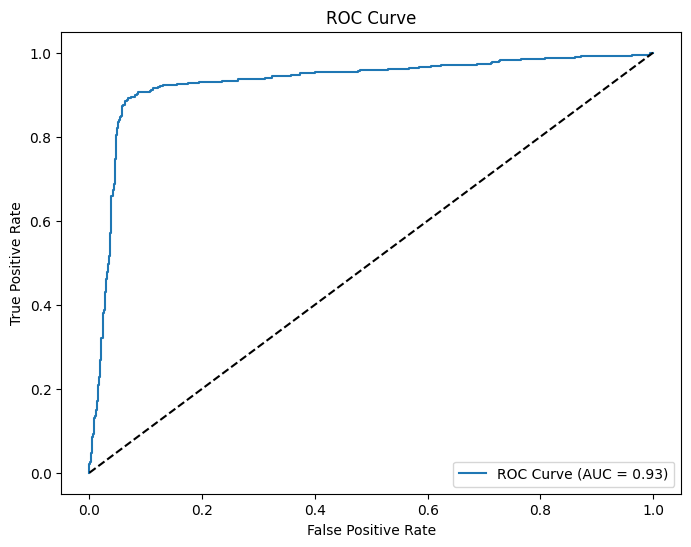

In [25]:
# ROC Curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score
#y_prob = logistic_regression.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc:.2f}')

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

ROC Curve (Receiver Operating Characteristic Curve): This is a plot of the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The ROC curve illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

AUC (Area Under the Curve): This metric summarizes the ROC curve into a single value representing the likelihood that the model will rank a randomly chosen positive instance higher than a randomly chosen negative one.

AUC = 0.5: No discrimination (random guessing)
0.5 < AUC < 0.7: Poor model
0.7 ≤ AUC < 0.8: Fair model
0.8 ≤ AUC < 0.9: Good model
0.9 ≤ AUC < 1: Excellent model

In [26]:
# Prediction on new data

New_data={'SMOKING':[1,1,0,0,1],
        'EXPOSURE_TO_POLLUTION':[1,1,1,0,0], 
        'ENERGY_LEVEL':[50.75,89.61,56.25,23.89,68.77],
        'BREATHING_ISSUE':[0,1,0,1,1],
        'THROAT_DISCOMFORT':[1,1,1,1,0],
       'FAMILY_HISTORY':[0,0,1,0,0], 
       'SMOKING_FAMILY_HISTORY':[0,1,1,0,0], 
       'STRESS_IMMUNE':[0,0,1,1,0]}
df2 = pd.DataFrame(New_data,columns=['SMOKING','EXPOSURE_TO_POLLUTION', 'ENERGY_LEVEL',
        'BREATHING_ISSUE','THROAT_DISCOMFORT',
       'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE'])

X_new_scaled = scaler.transform(df2)

# Add constant to the new data (df2)
df2_sm = sm.add_constant(X_new_scaled)

# Make predictions on the new data
y_pred_new = result.predict(df2_sm)

# Display the predictions
print(y_pred_new)

y_pred_binary_new = (y_pred_new >= 0.5).astype(int)
y_pred_binary_new

[1.32965658e-07 3.66115644e-02 5.68656960e-07 2.11086678e-06
 1.22178798e-07]


array([0, 0, 0, 0, 0])

In [27]:
# Checking Assumptions: Linearity
# Create a copy of the training data
x_train_trans = x_train.copy()

# Add log-transformed terms for continuous predictors
continuous_vars = ['SMOKING','EXPOSURE_TO_POLLUTION', 'ENERGY_LEVEL',
        'BREATHING_ISSUE','THROAT_DISCOMFORT',
       'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE']  # Replace with your actual column names
for var in continuous_vars:
    x_train_trans[f'log_{var}'] = np.log(x_train[var] + 1)  # Add 1 to avoid log(0)
    x_train_trans[f'interaction_{var}'] = x_train[var] * x_train_trans[f'log_{var}']

# Add constant column
x_train_trans = sm.add_constant(x_train_trans)

logit_model_interaction = sm.MNLogit(y_train, x_train_trans)
result_interaction = logit_model_interaction.fit()

# Print summary to check the significance of interaction terms
print(result_interaction.summary())

         Current function value: 0.357719
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:      PULMONARY_DISEASE   No. Observations:                 3500
Model:                        MNLogit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Thu, 13 Mar 2025   Pseudo R-squ.:                  0.4714
Time:                        00:03:30   Log-Likelihood:                -1252.0
converged:                      False   LL-Null:                       -2368.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
               PULMONARY_DISEASE=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                124.0975     66.283      1.872      0.061      -5.815     2

c:\Users\patel d d\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\patel d d\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:5475: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))


If the interaction term is significant, the relationship may not be linear, and you might need a transformation or nonlinear model.

In [28]:
# Checking Assumption: Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each variable in x_train_sm
vif_data = pd.DataFrame()
vif_data["Variable"] = x_train_sm.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]

# Print the VIF results
print(vif_data)

                 Variable        VIF
0                   const  60.996441
1                 SMOKING   1.434989
2   EXPOSURE_TO_POLLUTION   1.000618
3            ENERGY_LEVEL   1.000726
4         BREATHING_ISSUE   1.001438
5       THROAT_DISCOMFORT   1.000979
6          FAMILY_HISTORY   3.036094
7  SMOKING_FAMILY_HISTORY   3.489257
8           STRESS_IMMUNE   1.001038


Rule of Thumb: VIF > 10 indicates multicollinearity that may require attention.

In [29]:
# Check class distribution
print(pf_data['PULMONARY_DISEASE'].value_counts(normalize=True))

PULMONARY_DISEASE
0    0.5926
1    0.4074
Name: proportion, dtype: float64


If the classes are imbalanced, consider resampling techniques such as oversampling the minority class or using weighted models.